# Monitoring Wetlands in Africa

* **Products used:**
[ls8_sr](https://explorer.digitalearth.africa/ls8_sr), 
[wofs_ls](https://explorer.digitalearth.africa/wofs_ls), 
[fc_ls](https://explorer.digitalearth.africa/fc_ls)

### Background

According to [Wetlands International](https://africa.wetlands.org/en/wetlands/what-are-wetlands/), Africa’s wetlands ecosystems are estimated to cover 131 million hectares, and include some of the most productive and biodiverse ecosystems in the world. They provide a host of ecosystem services that contribute to human well-being through nutrition, water supply and purification, climate and flood regulation, coastal protection, feeding and nesting sites for animals, recreational opportunities and increasingly, tourism.  As such, the health of wetland ecosystems has been identified as an important metric for the `Sustainable Development Goals` ([6.6.1 Change in the extent of water-related ecosystems over time](https://www.sdg6monitoring.org/indicator-661/)). 

The `Wetlands Insight Tool (WIT)` provides insights into a wetland's seasonal and interannual dynamics. The WIT is a spatiotemporal summary of an wetland that combines multiple datasets derived from the Landsat archive held within DE Africa. `Fractional cover`, `WOfS`, and `Landsat surface reflectance` data are retrieved from DE Africa's ODC and combined to produce a stack plot describing the percentage of a wetland polygon as vegetation fractional cover, open water, and wet vegetation through time.  

> `Detailed Explanation:`
Data is retrieved for timesteps containing more than 80% cloud-free data (you can adjust this number in the code below). The code calculates the Tasselled-Cap Wetness (TCW, or just 'wetness') from surface reflectance and takes the maximum Fractional cover fraction per pixel, masking Fractional cover with TCW, and masking TCW with open water. For each pixel inside or overlapping the polygon describing the wetland, WIT calculates the dominant fractional cover type. WIT selects the largest percentage value for each pixel as the dominant fractional cover type. Fractional cover was masked using WOfS and TCW to remove areas of water and wet vegetation from areas where fractional cover is calculated. This is necessary as the fractional cover algorithm erroneously classifies water as green vegetation (PV). The resulting output is a stacked plot of open water, wet vegetation, photosynthetic vegetation, non-photosynthetic vegetation, and bare soil for the wetland polygon through time.

### Description
This notebook will run the Wetlands Insight Tool for the area encompassed by a polygon drawn on the interactive map.

1.  Draw a polygn using the interactive jupyter widget
2.  Set the parameters for the Wetlands Insight Tool
3.  Run the WIT tool, resulting in a stack plot of fractional cover, wetness, and water

## Getting started
**To run this analysis**, run all the cells in the notebook, starting with the "Load packages" cell.

**After finishing the analysis**, return to the "Analysis parameters" cell, modify some values (e.g. choose a different polygon or time period to analyse) and re-run the analysis.
There are additional instructions on modifying the notebook at the end.

***

### Load packages

In [ ]:
# !pip uninstall deafrica-tools -y
# !pip install ../Tools

In [1]:
import sys
sys.path.insert(1, '../Scripts')
from notebookapp_wetlands import select_region_app, WIT_app


/env/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(
/env/lib/python3.8/site-packages/datacube/storage/masking.py:7: DeprecationWarning: datacube.storage.masking has moved to datacube.utils.masking
  warnings.warn("datacube.storage.masking has moved to datacube.utils.masking",


## Analysis parameters

The following cell sets important parameters for the analysis:

* `date`: The exact date used to display the composite imagery on the map (e.g. for a geomedian composite, use the first day of the year: `date='2020-01-01'`).

* `product`: The DE Africa derived satellite product to be displayed on the map to help you trace a polygon around the your wetland of interest, e.g. `'gm_s2_annual'` for the Sentinel-2 geomedian product 

In [2]:
date='2019-01-01'
product='gm_s2_annual'

## Select location on a map

Run the following cell to plot the interactive map that is used to select the area where the Wetalnds insight tool will be run.

Select the `Draw a rectangle` or `Draw a polygon` tool on the left of the map, and draw a shape around the area you are interested in. When you are ready, press the green `done` button on the top right of the map.

>To keep load times reasonable, select an area smaller than 10000 square kilometers in size (this limit can be overuled by supplying the size_limit parameter in the select_region_app function below).



In [3]:
selection = select_region_app(date=date, 
                              product=product,
                              size_limit=12000)

Map(center=[4, 20], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

## Run the Wetlands Insight Tool

* `time_range`:
* `output_csv`:
* `output_plot`:
* `min_gooddata`:
* `dask_chunks`:

In [4]:
time_range = ('2018-01' , '2021-08')
output_csv='example_WIT.csv'
output_plot='example_WIT.png'
min_gooddata=0.80
dask_chunks=dict(x=1000, y=1000, time=1)

Now run the cell below to run the Wetlands Insight Tool and produce a plot.

The cell below will print a link to a `Dask Dashboard`, we recommend opening the Dask processing window to view the different computations that are being executed. This will also give you an idea of the progress of the computations.

Client Scheduler: tcp://127.0.0.1:33303 Dashboard: /user/chad/proxy/8787/status,Cluster Workers: 1 Cores: 4 Memory: 28.14 GB


<Figure size 432x288 with 0 Axes>

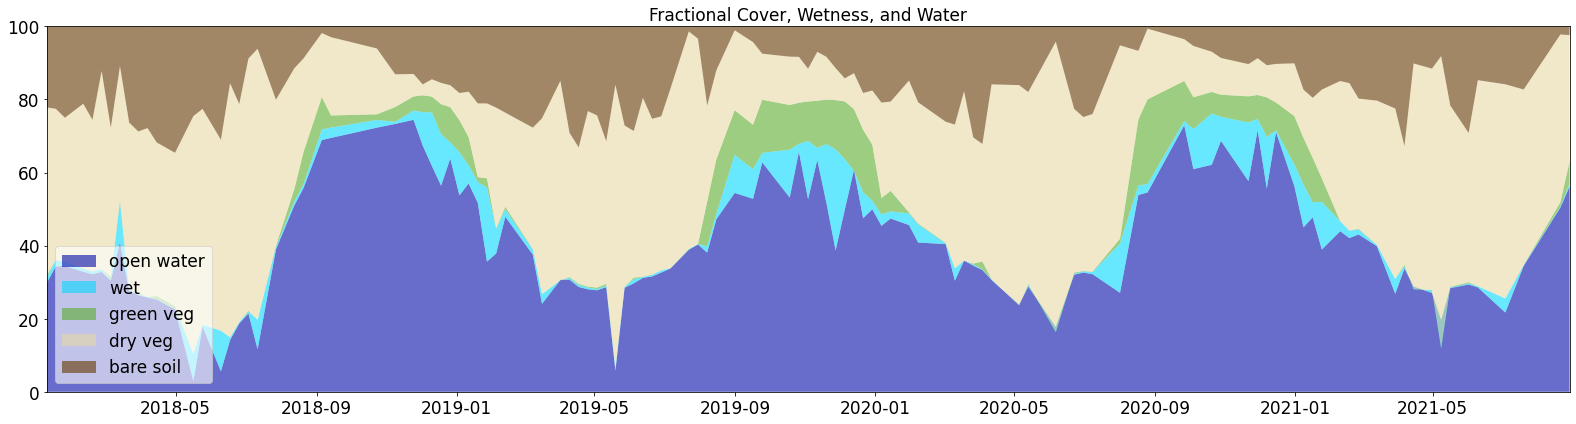

<Figure size 432x288 with 0 Axes>

In [5]:
df = WIT_app(gdf=selection,
        time_range=time_range,
        min_gooddata=min_gooddata,
        export_csv=output_csv,
        export_plot=output_plot,
        dask_chunks=dask_chunks,
        verbose=False
           )

## Next steps


***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Last modified:** Feb 2020

**Compatible `datacube` version:** 

In [ ]:
print(datacube.__version__)

## Tags
Browse all available tags on the DE Africa User Guide's [Tags Index]()